In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv(r'C:\Users\25492\Desktop\研究生集训模型2\历史用电数据_三并柜.csv')
data.isnull().sum() # 查找缺失值

date           0
system_id      0
system_type    0
data           0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         270 non-null    object
 1   system_id    270 non-null    int64 
 2   system_type  270 non-null    object
 3   data         270 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.6+ KB


In [21]:
data

,date,system_id,system_type,data
0,2023-05-21,-1,Time,"00:00,00:00:15,00:00:30,00:00:45,00:01,00:01:1..."
1,2023-05-21,1,CN,"0.0,0.0,79.6,120.7,121.2,121.1,121.2,119.5,121..."
2,2023-05-21,4,SD,"403.2,400.6,463.9,506.0,515.5,514.8,515.3,516...."
3,2023-05-22,-1,Time,"00:00,00:00:15,00:00:30,00:00:45,00:01,00:01:1..."
4,2023-05-22,1,CN,"0.0,120.6,120.8,120.5,121.1,120.7,120.7,120.5,..."
...,...,...,...,...
265,2023-08-17,1,CN,"0.0,150.6,151.3,151.0,151.6,151.9,150.6,151.2,..."
266,2023-08-17,4,SD,"639.1,780.7,783.2,774.3,787.7,781.7,791.3,803...."
267,2023-08-18,-1,Time,"00:00,00:00:15,00:00:30,00:00:45,00:01,00:01:1..."
268,2023-08-18,1,CN,"0.0,151.5,151.3,152.6,151.4,149.9,150.7,151.7,..."


In [22]:

def split_data(data,i):
    data_split = data.iloc[i:i+3,3].str.split(',', expand=True).T
    data_split.columns = ['Time','CN','SD']
    for j in range(0,data_split.shape[0]):
        if len(data_split.iloc[j,0]) < 8:
            data_split.iloc[j,0] = str(data_split.iloc[j,0]) + ':00'
    data_split['Time'] = data_split['Time'].apply(lambda x: str(data.iloc[i,0])+' '+str(x))
    data_split['Time'] = pd.to_datetime(data_split['Time'])
    return data_split
data_new = []
for i in range(0,data.shape[0],3):
    data_split = split_data(data,i)
    data_new.append(data_split)
data_new


[                    Time     CN     SD
 0    2023-05-21 00:00:00    0.0  403.2
 1    2023-05-21 00:00:15    0.0  400.6
 2    2023-05-21 00:00:30   79.6  463.9
 3    2023-05-21 00:00:45  120.7  506.0
 4    2023-05-21 00:01:00  121.2  515.5
 ...                  ...    ...    ...
 5755 2023-05-21 23:58:45    0.0  399.9
 5756 2023-05-21 23:59:00    0.0  409.6
 5757 2023-05-21 23:59:15    0.0  407.5
 5758 2023-05-21 23:59:30    0.0  412.9
 5759 2023-05-21 23:59:45    0.0  401.3
 
 [5760 rows x 3 columns],
                     Time     CN     SD
 0    2023-05-22 00:00:00    0.0  404.6
 1    2023-05-22 00:00:15  120.6  524.7
 2    2023-05-22 00:00:30  120.8  528.6
 3    2023-05-22 00:00:45  120.5  522.7
 4    2023-05-22 00:01:00  121.1  521.8
 ...                  ...    ...    ...
 5755 2023-05-22 23:58:45    0.0  606.5
 5756 2023-05-22 23:59:00    0.0  562.7
 5757 2023-05-22 23:59:15    0.0  601.8
 5758 2023-05-22 23:59:30    0.0  600.0
 5759 2023-05-22 23:59:45    0.0  612.6
 
 [5760 row

In [23]:
data_concat = pd.concat(data_new, axis=0, ignore_index=True)
data_concat

,Time,CN,SD
0,2023-05-21 00:00:00,0.0,403.2
1,2023-05-21 00:00:15,0.0,400.6
2,2023-05-21 00:00:30,79.6,463.9
3,2023-05-21 00:00:45,120.7,506.0
4,2023-05-21 00:01:00,121.2,515.5
...,...,...,...
516458,2023-08-18 23:58:45,0.0,585.1
516459,2023-08-18 23:59:00,0.0,588.4
516460,2023-08-18 23:59:15,0.0,578.6
516461,2023-08-18 23:59:30,0.0,603.4


In [24]:
data_concat['FH'] = data_concat['SD'].astype(float)-data_concat['CN'].astype(float)
data_concat

,Time,CN,SD,FH
0,2023-05-21 00:00:00,0.0,403.2,403.2
1,2023-05-21 00:00:15,0.0,400.6,400.6
2,2023-05-21 00:00:30,79.6,463.9,384.3
3,2023-05-21 00:00:45,120.7,506.0,385.3
4,2023-05-21 00:01:00,121.2,515.5,394.3
...,...,...,...,...
516458,2023-08-18 23:58:45,0.0,585.1,585.1
516459,2023-08-18 23:59:00,0.0,588.4,588.4
516460,2023-08-18 23:59:15,0.0,578.6,578.6
516461,2023-08-18 23:59:30,0.0,603.4,603.4


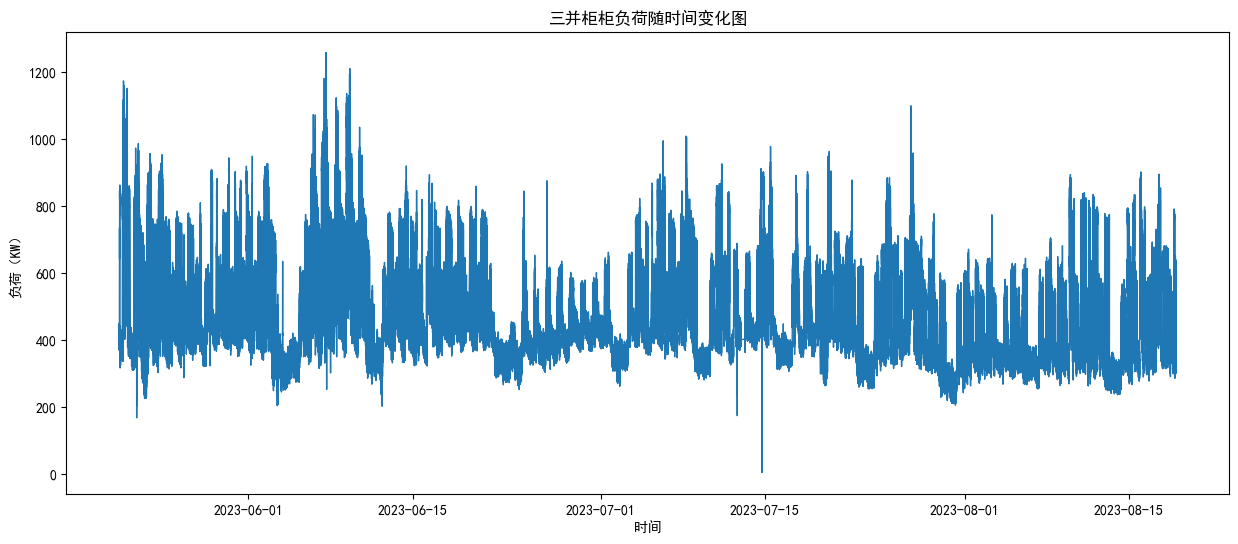

In [28]:

plt.figure(figsize=(15, 6))
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.plot(data_concat['Time'], data_concat['FH'], linewidth=1)
plt.xlabel('时间')
plt.ylabel('负荷（KW）')
plt.title('三并柜柜负荷随时间变化图')
plt.savefig('三并柜负荷随时间变化图.png',dpi=500)
plt.show()

In [26]:
data_concat.to_csv('三并柜数据.csv')